### Starting Off?

You are a data scientist for the MTA. For your first project, they want you to predict the number of subway riders for each day. You decide to do a linear regression model predict the riders but need to gather data first. With a partner brainstorm a list of different variables you think would explain the number of daily riders.  

# Linear Models with Python
Agenda Today:
- Clarifications
- Create a simple linear regression with Statsmodels
- Interpret the Output of a linear regression
- Create a model for multiple linear regression
- Interpret the output for multiple linear regression


## Logic, Math, and Code

- **Logic**: Do I understand conceptually what is going on?
- **Math**: Can I calculate the formula/equation that we are using?
- **Code**: Can I get the computer to do the math?


## Regression VS. Classification
**Regression** predictive modeling is the task of approximating a mapping function (f) from input variables (X) to a continuous output variable (y).

A continuous output variable is a real-value, such as an integer or floating point value. 
*EX:* 
    - The cost of a house
    - Number of wubway riders

**Classification**  predictive modeling is the task of approximating a mapping function (f) from input variables (X) to discrete output variables (y).

The output variables are often called labels or categories. The mapping function predicts the class or category for a given observation.
    - Does a person have diabetes
    - The type of flower in a picture
    - Will someone be accepted to a college
    - Will there be a catastropic weather even within the next 3 months.

On Rotten Tomatoes, there is both an overall approval rating and a classification of Fresh or not.  The overall approval rating would be a regression problem, while fresh would be a classification problem.  

### Practice

Determine if the following problems should be solved with a regression or classification model.

- The number of points two teams will score in a basketball game.
- The political party of the next President.
- Whether a wine will be consider above average on a rating scale.
- The number of children a couple will have.


## Build a SLR model in python

In [1]:
# build a simple linear regression in python
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [2]:
df = sns.load_dataset('mpg')

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


/Users/swilson5/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/swilson5/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


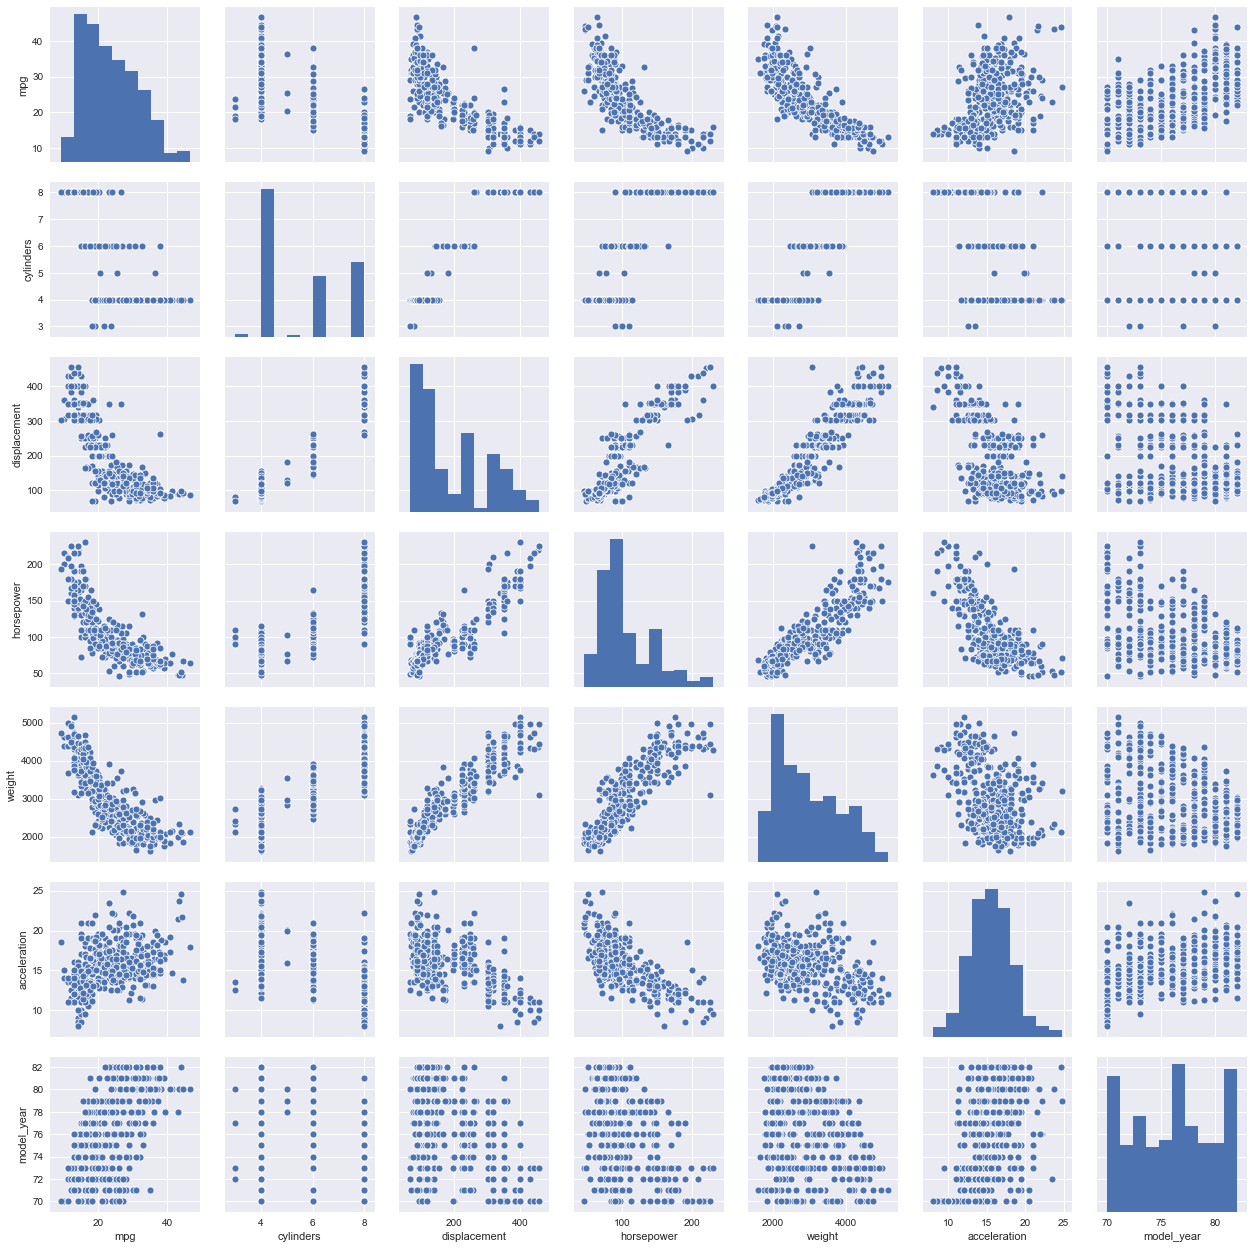

In [4]:
sns.pairplot(df)


In [5]:
# we will only work with mpg and weight here 
df_weight = df[['mpg','weight']].copy()

In [6]:
df_weight.shape

(398, 2)

In [7]:
df_weight.head()

,mpg,weight
0,18.0,3504
1,15.0,3693
2,18.0,3436
3,16.0,3433
4,17.0,3449


Text(0.5, 1.0, 'Correlation plot')

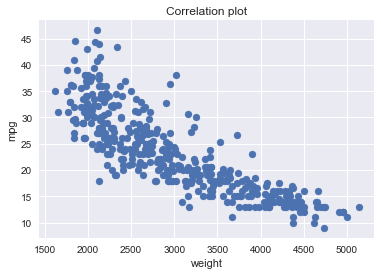

In [8]:
# check for correlation
plt.scatter(df.weight, df.mpg)
plt.xlabel('weight')
plt.ylabel('mpg')
plt.title("Correlation plot")
# what can we say about the correlation between mpg and weight?

In [9]:
# building a linear regression model using statsmodel 
from statsmodels.formula.api import ols

lr_model = ols(formula='mpg~weight', data=df_weight).fit()

Describe what you think the following things are doing.

`ols()`

`formula = 'mpg~weight`

`data=df`

`fit()`

In [10]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     888.9
Date:                Thu, 11 Apr 2019   Prob (F-statistic):          2.97e-103
Time:                        14:31:45   Log-Likelihood:                -1148.4
No. Observations:                 398   AIC:                             2301.
Df Residuals:                     396   BIC:                             2309.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.3174      0.795     58.243      0.000      44.754      47.881
weight        -0.0077      0.000    -29.814      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       40.423   Durbin-Watson:                   0.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.695
Skew:                           0.713   Prob(JB):                     4.89e-13
Kurtosis:                       4.176   Cond. No.                     1.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interpreting the summary Output

### How to interpret the P-Values
The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis. In other words, a predictor that has a low p-value is likely to be a meaningful addition to your model because changes in the predictor's value are related to changes in the response variable.

Conversely, a larger (insignificant) p-value suggests that changes in the predictor are not associated with changes in the response.

### How Do I Interpret the Regression Coefficients for Linear Relationships?
Regression coefficients represent the mean change in the response variable for one unit of change in the predictor variable while holding other predictors in the model constant. 

This statistical control that regression provides is important because it isolates the role of one variable from all of the others in the model.

The key to understanding the coefficients is to think of them as slopes, and they’re often called slope coefficients. 

The coefficient for weight in this model is -0.0077. That means for every increase of 1lb for a car, we would expect the mpg to go down by 0.0077

### Practice
This is the linear regression model.

$y = \beta_0 + \beta_1x$


Can you take the take the output of model summary and use it to rewrite the model with acual values?

(*Replace the betas with numbers*)


In [11]:
# write the new equation here

Please predict the amount of MPG you expect for a car weighing 2,345lbs

In [12]:
# write code here
46.3174 - .0077*2345

28.2609

## Part IV. Assumptions of Linear Regression


1. Error is normally distributed $\epsilon ~ N(0, \sigma ^2)$
2. Error term is assumed to be independent
3. Homogeneity of Variance (Homoscedasticity)
4. Linearity

In [13]:
# checking for our model - Homoscedasticity
pred_val = lr_model.fittedvalues.copy()
true_val = df['mpg'].values.copy()
residual = true_val - pred_val

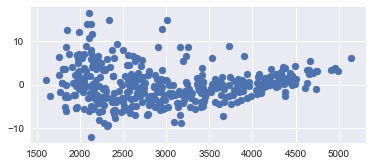

In [14]:
fig, ax = plt.subplots(figsize=(6,2.5))
ax.scatter(df['weight'],residual)

In [15]:
# variance is increasing as the mean of the X increases. It is not uncommon to see that 

((array([-2.9218026 , -2.63365901, -2.47116016, -2.35569541, -2.26506662,
         -2.18993277, -2.12544338, -2.06874358, -2.01800561, -1.97198606,
         -1.92979922, -1.89079106, -1.8544643 , -1.82043173, -1.78838568,
         -1.75807748, -1.72930318, -1.70189331, -1.67570551, -1.65061892,
         -1.62653011, -1.60334977, -1.58100027, -1.55941369, -1.53853025,
         -1.51829701, -1.49866692, -1.47959792, -1.46105224, -1.4429959 ,
         -1.42539813, -1.40823104, -1.39146921, -1.37508946, -1.35907055,
         -1.34339299, -1.32803884, -1.31299155, -1.2982358 , -1.28375744,
         -1.26954329, -1.25558111, -1.2418595 , -1.22836781, -1.21509608,
         -1.202035  , -1.18917582, -1.17651032, -1.1640308 , -1.15172997,
         -1.13960098, -1.12763737, -1.11583302, -1.10418213, -1.09267923,
         -1.08131913, -1.07009688, -1.05900781, -1.04804745, -1.03721157,
         -1.02649613, -1.01589727, -1.00541132, -0.99503477, -0.98476427,
         -0.97459661, -0.96452872, -0.

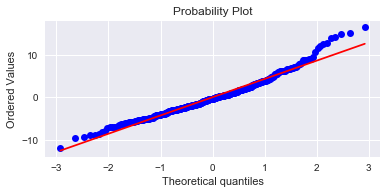

In [16]:
# checking for normality - QQ plot 
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
sp.stats.probplot(residual, plot=ax, fit=True)


The Q-Q plot can answer questions such as:
- Do two data sets have common location and scale?
- Do two data sets have similar distributional shapes?
- Do two data sets have similar tail behavior?

## Multiple Linear Regression
Multiple linear regression is simply a linear regression with more than one predictor, or independent variables. Let's recall the interpretation of $R^2$ in simple linear regression represents the proportion of variance explained by the model. What if we make the model more complex by including more predictors in it such that it account for even more variance in the outcome?


$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + + \beta_3 X_3\cdots + \beta_k X_k + \epsilon$

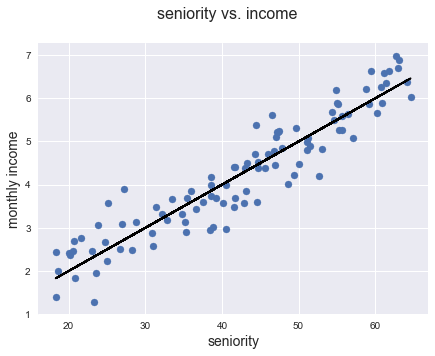

In [17]:
import numpy as np
np.random.seed(1234)
sen = np.random.uniform(18, 65, 100)
income = np.random.normal((sen/10), 0.5)
sen = sen.reshape(-1,1)

fig = plt.figure(figsize=(7,5))
fig.suptitle('seniority vs. income', fontsize=16)
plt.scatter(sen, income)
plt.plot(sen, sen/10, c = "black")
plt.xlabel("seniority", fontsize=14)
plt.ylabel("monthly income", fontsize=14)
plt.show()

What if we include another factor, such as years of education? All that is doing is adding a higher dimensional object to the model, so our model will be three dimensional. 
<img src="multi_reg_graph.png" style="withd:300px;">

In [18]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## Multicollinearity 

**Multicollinearity** occurs when independent variables in a regression model are correlated. This correlation is a problem because independent variables should be independent. If the degree of correlation between variables is high enough, it can cause problems when you fit the model and interpret the results.

The interpretation of a regression coefficient is that it represents the mean change in the dependent variable for each 1 unit change in an independent variable when you hold all of the other independent variables constant.

There are two basic kinds of multicollinearity:

- **Structural multicollinearity:** This type occurs when we create a model term using other terms. In other words, it’s a byproduct of the model that we specify rather than being present in the data itself. For example, if you square term X to model curvature, clearly there is a correlation between X and X2.
- **Data multicollinearity:** This type of multicollinearity is present in the data itself rather than being an artifact of our model. Observational experiments are more likely to exhibit this kind of multicollinearity.

### What Problems Do Multicollinearity Cause?

Multicollinearity causes the following two basic types of problems:

- The coefficient estimates can swing wildly based on which other independent variables are in the model. The coefficients become very sensitive to small changes in the model.
- Multicollinearity reduces the precision of the estimate coefficients, which weakens the statistical power of your regression model. You might not be able to trust the p-values to identify independent variables that are statistically significant.

### Do I Have to Fix Multicollinearity?

The need to reduce multicollinearity depends on its severity and your primary goal for your regression model. Keep the following three points in mind:

- The severity of the problems increases with the degree of the multicollinearity. Therefore, if you have only moderate multicollinearity, you may not need to resolve it.
- Multicollinearity affects only the specific independent variables that are correlated. Therefore, if multicollinearity is not present for the independent variables that you are particularly interested in, you may not need to resolve it. 
- Multicollinearity affects the coefficients and p-values, but it does not influence the predictions, precision of the predictions, and the goodness-of-fit statistics. If your primary goal is to make predictions, and you don’t need to understand the role of each independent variable, you don’t need to reduce severe multicollinearity.

***That being said, the easies way to deal with multicollinearity is just to remove one of the variables***

In [19]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


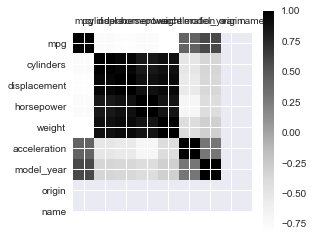

In [20]:
plt.matshow(df.corr())
plt.xticks(range(len(df.columns)), df.columns)
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()
plt.show()

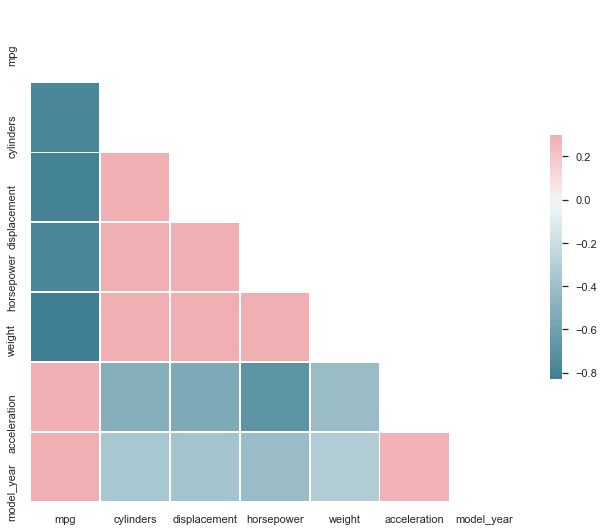

In [21]:
sns.set(style="white")



# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [22]:
df.cylinders.unique()

array([8, 4, 6, 3, 5])

### Working with Categorical Variable¶

As we have covered last week, including categorical variables in linear regression allows us to compare mean values for different groups. We can work with categorical variables in multiple regression by transforming it to dummy variable.

Converting a categorical variable to dummy variables is essentially creating new columns of  (𝑛−1)  encoded as either 1 or 0, where n represents the levels in the variable. For example, if we want to convert the season variable from last week to dummy variable, we would create 3 columns for them. Let's look at an example

### Question

Which variables from this df should be dummy encoded and which can we leave as is?

In [23]:
#turn a categorical column into multiple dummy columns
cylinders_dummy = pd.get_dummies(df['cylinders'],prefix = 'cylinders')
cylinders_dummy.tail(10)

,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8
388,0,1,0,0,0
389,0,0,0,1,0
390,0,1,0,0,0
391,0,1,0,0,0
392,0,1,0,0,0
393,0,1,0,0,0
394,0,1,0,0,0
395,0,1,0,0,0
396,0,1,0,0,0
397,0,1,0,0,0


In [24]:
df_dummies = pd.concat([df, cylinders_dummy], axis = 1)
df_dummies.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,0,0,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,0,0,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,0,0,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,0,0,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,0,0,0,0,1


In [25]:
df_dummies.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name', 'cylinders_3',
       'cylinders_4', 'cylinders_5', 'cylinders_6', 'cylinders_8'],
      dtype='object')

In [26]:
mlr_model = ols(formula='mpg~weight+horsepower+cylinders_3+cylinders_4+cylinders_5+cylinders_6', data=df_dummies).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     184.6
Date:                Thu, 11 Apr 2019   Prob (F-statistic):          5.34e-110
Time:                        14:31:45   Log-Likelihood:                -1095.6
No. Observations:                 392   AIC:                             2205.
Df Residuals:                     385   BIC:                             2233.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      43.6642      2.390     18.268      0.000      38.965      48.364
weight         -0.0046      0.001     -7.482      0.000      -0.006      -0.003
horsepower     -0.0608      0.012     -5.063      0.000      -0.084      -0.037
cylinders_3    -5.9600      2.251     -2.647      0.008     -10.387      -1.533
cylinders_4     1.0660      1.184      0.900      0.369      -1.263       3.395
cylinders_5     3.0957      2.482      1.247      0.213      -1.785       7.976
cylinders_6    -2.6738      0.877     -3.048      0.002      -4.399      -0.949
==============================================================================
Omnibus:                       51.069   Durbin-Watson:                   0.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.068
Skew:                           0.792   Prob(JB):                     3.37e-19
Kurtosis:                       4.642   Cond. No.                     4.97e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.97e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
#practice turn the origin column into dummy variables and rerun your model.  

## Resources

Everything about regression:  https://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-tutorial-and-examples

Statsmodels example: https://datatofish.com/statsmodels-linear-regression/

In [69]:
df = sns.load_dataset('mpg')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c25b0ac88>,
      dtype=object)

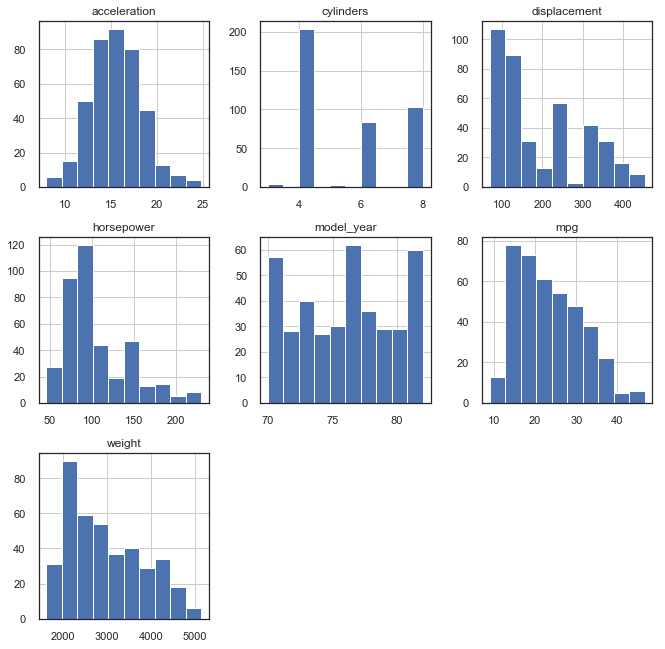

In [70]:
df[df.dtypes[(df.dtypes=="float64")|(df.dtypes=="int64")].index.values].hist(figsize=[11,11])

In [71]:
df_origin = pd.get_dummies(df['origin'],prefix = 'origin')


In [72]:
from sklearn.preprocessing import StandardScaler 
  
  
# Initialise the Scaler 
scaler = StandardScaler() 
  
# To scale data 
scaler.fit(df[['weight','horsepower']]) 

scaled_data =scaler.transform(df[['weight','horsepower']])


/Users/swilson5/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/swilson5/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


In [73]:
df_scaled = pd.DataFrame(scaled_data, columns=['weight_scaled', 'horsepower_scaled'])



In [74]:
df = pd.concat([df, df_scaled,df_origin], axis = 1)

In [84]:
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,weight_scaled,horsepower_scaled,origin_europe,origin_japan,origin_usa,displacement_mm
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,0.630870,0.664133,0,0,1,0.617571
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,0.854333,1.574594,0,0,1,0.728682
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,0.550470,1.184397,0,0,1,0.645995
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,0.546923,1.184397,0,0,1,0.609819
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,0.565841,0.924265,0,0,1,0.604651
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500,1.620492,2.433030,0,0,1,0.932817
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala,1.635863,3.005320,0,0,1,0.997416
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii,1.586204,2.875254,0,0,1,0.961240
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina,1.719809,3.135386,0,0,1,1.000000
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl,1.039961,2.224924,0,0,1,0.832041


In [77]:
scaled_model = ols(formula='mpg~weight+horsepower+origin_europe+origin_japan', data=df).fit()
scaled_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     247.9
Date:                Thu, 11 Apr 2019   Prob (F-statistic):          2.44e-105
Time:                        14:57:49   Log-Likelihood:                -1112.2
No. Observations:                 392   AIC:                             2234.
Df Residuals:                     387   BIC:                             2254.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        42.7400      1.101     38.815      0.000      40.575      44.905
weight           -0.0048      0.001     -8.878      0.000      -0.006      -0.004
horsepower       -0.0535      0.011     -4.875      0.000      -0.075      -0.032
origin_europe     0.9611      0.640      1.501      0.134      -0.298       2.220
origin_japan      2.7422      0.652      4.208      0.000       1.461       4.024
==============================================================================
Omnibus:                       35.026   Durbin-Watson:                   0.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.308
Skew:                           0.658   Prob(JB):                     5.33e-11
Kurtosis:                       4.078   Cond. No.                     1.85e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
scaled_model = ols(formula='mpg~weight_scaled+horsepower_scaled+origin_europe+origin_japan', data=df).fit()
scaled_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     247.9
Date:                Thu, 11 Apr 2019   Prob (F-statistic):          2.44e-105
Time:                        14:57:27   Log-Likelihood:                -1112.2
No. Observations:                 392   AIC:                             2234.
Df Residuals:                     387   BIC:                             2254.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.7612      0.294     77.362      0.000      22.183      23.340
weight_scaled        -4.0959      0.461     -8.878      0.000      -5.003      -3.189
horsepower_scaled    -2.0583      0.422     -4.875      0.000      -2.888      -1.228
origin_europe         0.9611      0.640      1.501      0.134      -0.298       2.220
origin_japan          2.7422      0.652      4.208      0.000       1.461       4.024
==============================================================================
Omnibus:                       35.026   Durbin-Watson:                   0.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.308
Skew:                           0.658   Prob(JB):                     5.33e-11
Kurtosis:                       4.078   Cond. No.                         5.50
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
from sklearn.preprocessing import MinMaxScaler 
  
  
# Initialise the Scaler 
mm_scaler = MinMaxScaler() 
  
# To scale data 
mm_scaler.fit(df[['displacement']]) 

mm_scaled_data =mm_scaler.transform(df[['displacement']])


In [82]:
df_scaled_mm = pd.DataFrame(mm_scaled_data, columns=['displacement_mm'])


In [83]:
df = pd.concat([df, df_scaled_mm], axis = 1)